In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
sales_df = pd.read_csv("Orders Table.csv")
sales_df = sales_df.drop(['Unnamed: 0'], axis = 1)
sales_df = sales_df.set_index('ProductID')
# sales_df['Promotional Period'] = np.random.choice(a = [0,1], p = [0.8, 0.2], size=len(sales_df))
sales_df.head(10)
# sales_df.to_csv('Orders Table.csv')

,OrderID,CustomerID,Order Date,Shipping Date,Actual days for shipping,Scheduled days for shipping,Late Delivery Risk,Discount Percentage,Returns,Promotional Period,Product Name,Category,Price,Supplier_ID,Order Region,Order State,Order Item Quantity,Order Country
ProductID,,,,,,,,,,,,,,,,,,
5246,77202,15795,1/31/2018 22:56,2/3/18 22:56,3,4,0,0.04,0,0,uptownie lite womens maxi jumpsuit,Clothing,28.79,149,Southeast Asia,Java Occidental,1,Indonesia
2362,75939,860,1/13/2018 12:27,1/18/2018 12:27,5,4,1,0.05,1,1,waanmayi womens kanjivaram soft silk saree wit...,Clothing,44.02,139,South Asia,Rajastán,1,India
13940,75938,76820,1/13/2018 12:06,1/17/2018 12:06,4,4,0,0.06,0,0,antoniya heavy modal chanderi cotton embroider...,Clothing,47.99,142,South Asia,Rajastán,1,India
1105,75937,54886,1/13/2018 11:45,1/16/2018 11:45,3,4,0,0.07,0,1,white feather portable heat sealer mini sealin...,Home Appliances,5.99,94,Oceania,Queensland,1,Australia
2987,75936,6265,1/13/2018 11:24,1/15/2018 11:24,2,4,0,0.09,0,1,mizago womens casual full sleeve floral print top,Clothing,14.39,135,Oceania,Queensland,1,Australia
285,75935,82386,1/13/2018 11:03,1/19/2018 11:03,6,4,0,0.10,0,1,tata sky digital tv hd setup box remote,Electronics,5.99,23,Oceania,Queensland,1,Australia
10276,75934,37194,1/13/2018 10:42,1/15/2018 10:42,2,1,1,0.12,0,1,avni lush certified 100 organic cotton washabl...,Clothing,11.99,143,Eastern Asia,Guangdong,1,China
4506,75933,87498,1/13/2018 10:21,1/15/2018 10:21,2,1,1,0.13,0,1,sourbh womens fancy cotton printed straight fi...,Clothing,35.99,140,Eastern Asia,Guangdong,1,China
16345,75932,44131,1/13/2018 10:00,1/16/2018 10:00,3,2,1,0.15,0,1,izibra womens pure kanjivaram silk saree kanch...,Clothing,59.99,135,Eastern Asia,Guangdong,1,China


In [169]:
# products_df = pd.read_csv("Products Table.csv")
# # products_df = products_df.drop(['Unnamed: 0'], axis = 1)
# products_df.head(10)

In [170]:
# join on Product ID

# products_df = products_df.set_index('ProductID')
# joined_df = sales_df.join(products_df, lsuffix="_sales", rsuffix="_products")
# joined_df.tail(10)

In [171]:
### EDA
df = sales_df

# split Order Date column into Date and Time columns
df[['Order Date', 'Order Time']] = df['Order Date'].str.split(' ', expand=True)

# convert Date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')

# extract month from Date
df['Month'] = df['Order Date'].dt.strftime('%b')

# drop day and time from Order Date column
df['Year-Month'] = df['Order Date'].dt.strftime('%Y-%m')

# drop unused columns
df = df.drop(['CustomerID', 'OrderID'], axis = 1)

# normalise Sales column
# df['log_sales'] = np.log(df['Sales'])
# df['scaled_sales'] = np.log(df['Sales'] / df['Product Price'])

# sort by date
df = df.sort_values('Order Date')

df.head(10)

,Order Date,Shipping Date,Actual days for shipping,Scheduled days for shipping,Late Delivery Risk,Discount Percentage,Returns,Promotional Period,Product Name,Category,Price,Supplier_ID,Order Region,Order State,Order Item Quantity,Order Country,Order Time,Month,Year-Month
ProductID,,,,,,,,,,,,,,,,,,,
6598,2015-01-01,1/3/15 12:15,2,2,0,0.06,0,0,rock paper scissors premium flare gym pants hi...,Clothing,20.99,130,Central America,Morelos,4,México,12:15,Jan,2015-01
1282,2015-01-01,1/4/15 3:51,3,4,0,0.02,0,0,proven copper mineral rouvuf 10 to 12 liter r...,Home Appliances,239.88,115,Eastern Asia,Shanghái,1,China,3:51,Jan,2015-01
14813,2015-01-01,1/4/15 3:51,3,4,0,0.07,0,1,anni designer womens cotton blend printed anar...,Clothing,31.19,127,South Asia,Punyab,5,Pakistán,3:51,Jan,2015-01
7742,2015-01-01,1/7/15 17:10,6,4,0,0.03,0,1,pratham blue womens sequins georgette fancy sa...,Clothing,47.99,130,Southern Europe,Lombardía,1,Italia,17:10,Jan,2015-01
10556,2015-01-01,1/7/15 15:24,6,4,1,0.16,0,1,shaun womens regular fit cotton blend track pant,Clothing,11.99,145,South Asia,Uttar Pradesh,1,India,15:24,Jan,2015-01
4894,2015-01-01,1/3/15 14:42,2,1,1,0.03,0,0,pujia mills womens heavy silver jari thread re...,Clothing,36.00,145,Central America,San Salvador,1,El Salvador,14:42,Jan,2015-01
11945,2015-01-01,1/4/15 19:37,3,4,0,0.25,0,1,coblue by rupa 100 cotton panties for women pa...,Clothing,4.79,127,Southern Europe,Ceuta,4,España,19:37,Jan,2015-01
5523,2015-01-01,1/7/15 1:24,6,4,1,0.16,0,0,youstylo you are priority mens womens slouchy...,Clothing,11.99,127,Central America,San Salvador,5,El Salvador,1:24,Jan,2015-01
17383,2015-01-01,1/3/15 22:04,2,1,1,0.16,1,0,woodentant women handloom checkered pure cotto...,Clothing,26.40,144,Southeast Asia,Capital Nacional,4,Filipinas,22:04,Jan,2015-01


In [173]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)
df_month = df.sort_values(by='Month')

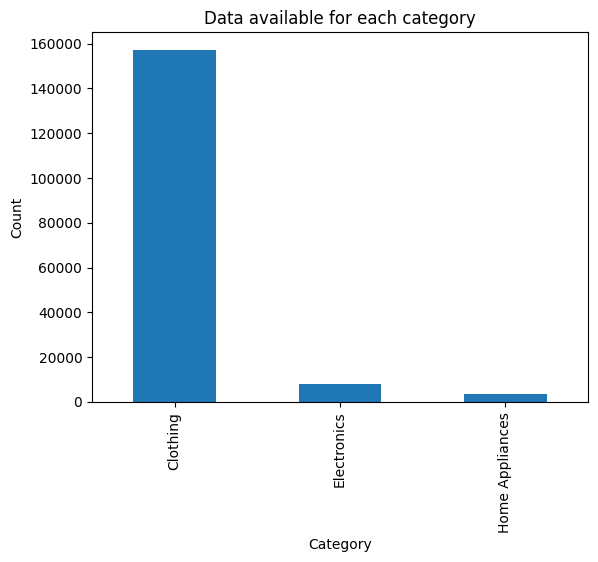

In [174]:
category_sizes = df.groupby('Category').size()
category_sizes.plot(kind = 'bar')

plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Data available for each category")
plt.show()

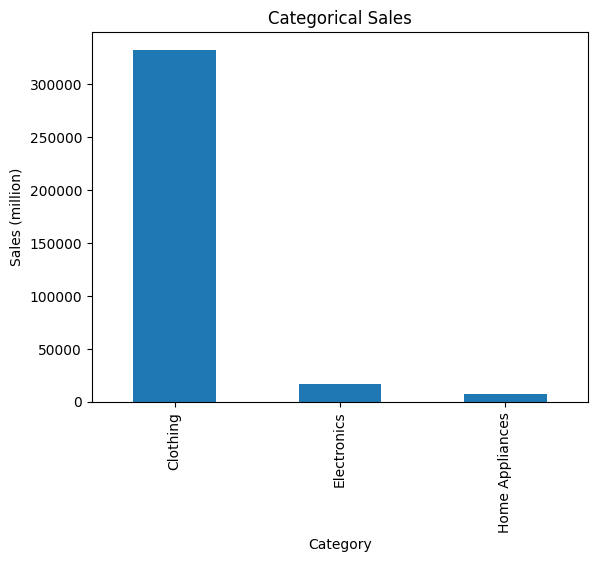

In [175]:
category_sales = df.groupby('Category')['Order Item Quantity'].sum()

category_sales.plot(kind = 'bar')

plt.xlabel("Category")
plt.ylabel("Sales (million)")
plt.title("Categorical Sales")
plt.show()

C:\Users\kahsu\AppData\Local\Temp\ipykernel_34360\557940995.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_sizes = df_month.groupby('Month').size()


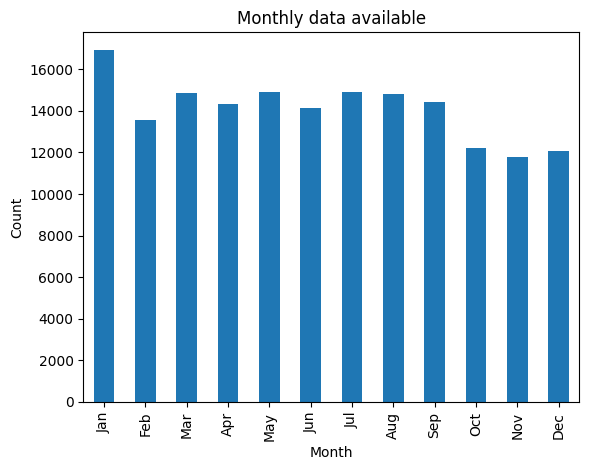

In [176]:
month_sizes = df_month.groupby('Month').size()

month_sizes.plot(kind = 'bar')

plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Monthly data available")
plt.show()

C:\Users\kahsu\AppData\Local\Temp\ipykernel_34360\1139429340.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_sales = df_month.groupby('Month')['Order Item Quantity'].sum() / 1e6


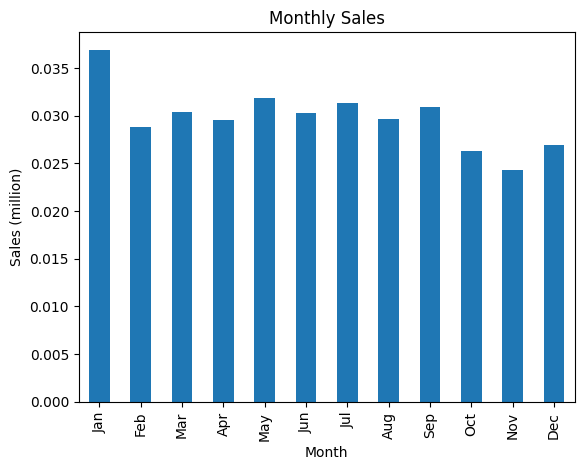

In [177]:
month_sales = df_month.groupby('Month')['Order Item Quantity'].sum() / 1e6

month_sales.plot(kind = 'bar')

plt.xlabel("Month")
plt.ylabel("Sales (million)")
plt.title("Monthly Sales")
plt.show()

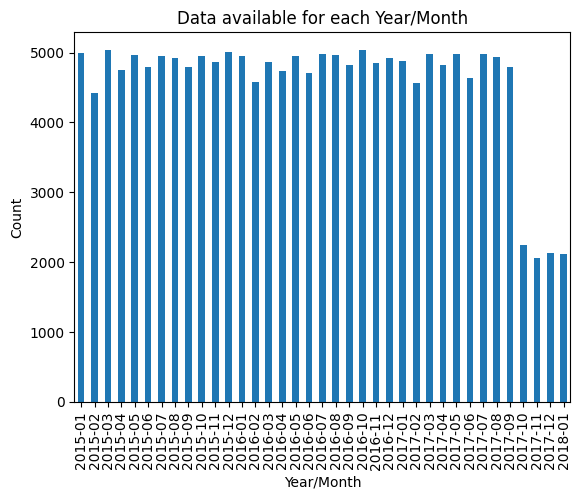

In [178]:
date_sizes = df.groupby('Year-Month').size()
date_sizes.plot(kind = 'bar')

plt.xlabel("Year/Month")
plt.ylabel("Count")
plt.title("Data available for each Year/Month")
plt.show()

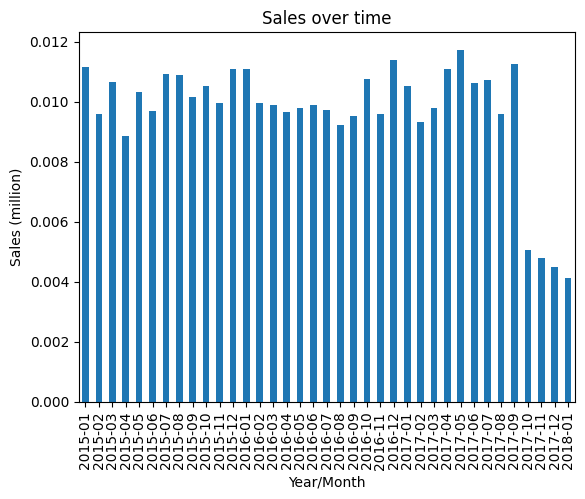

In [179]:
date_sales = df.groupby('Year-Month')['Order Item Quantity'].sum() / 1e6
date_sales.plot(kind = 'bar')

plt.xlabel("Year/Month")
plt.ylabel("Sales (million)")
plt.title("Sales over time")
plt.show()

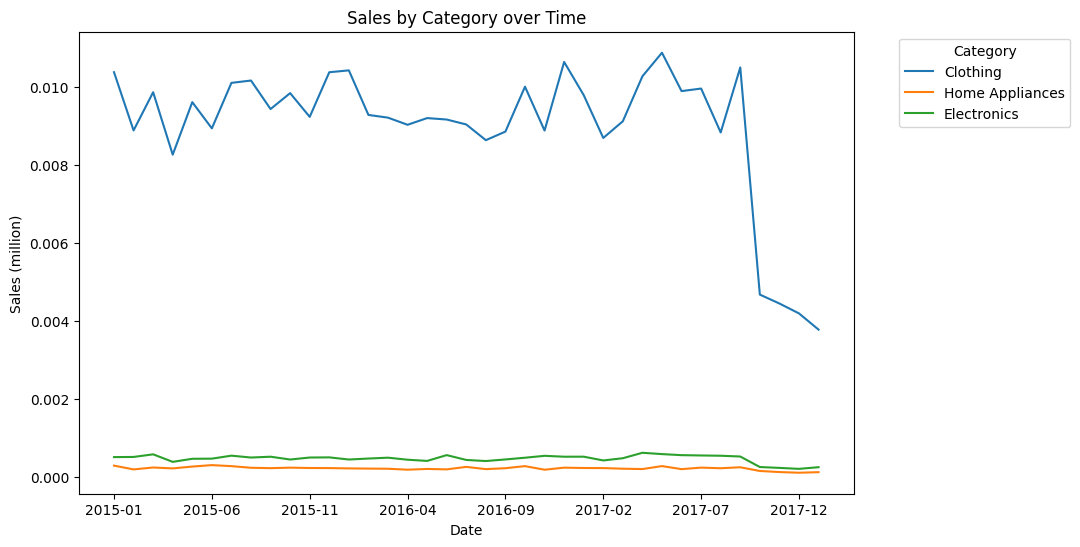

In [180]:
categories = df['Category'].unique()

plt.figure(figsize=(10, 6))

for category in categories:
    # Filter the dataframe for each category
    product_data = df[df['Category'] == category]
        
    # Plot the sales over time for this category
    date_sales = product_data.groupby('Year-Month')['Order Item Quantity'].sum() / 1e6
    date_sales.plot(kind = 'line', label=f'{category}')

plt.xlabel('Date')
plt.ylabel('Sales (million)')
plt.title('Sales by Category over Time')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

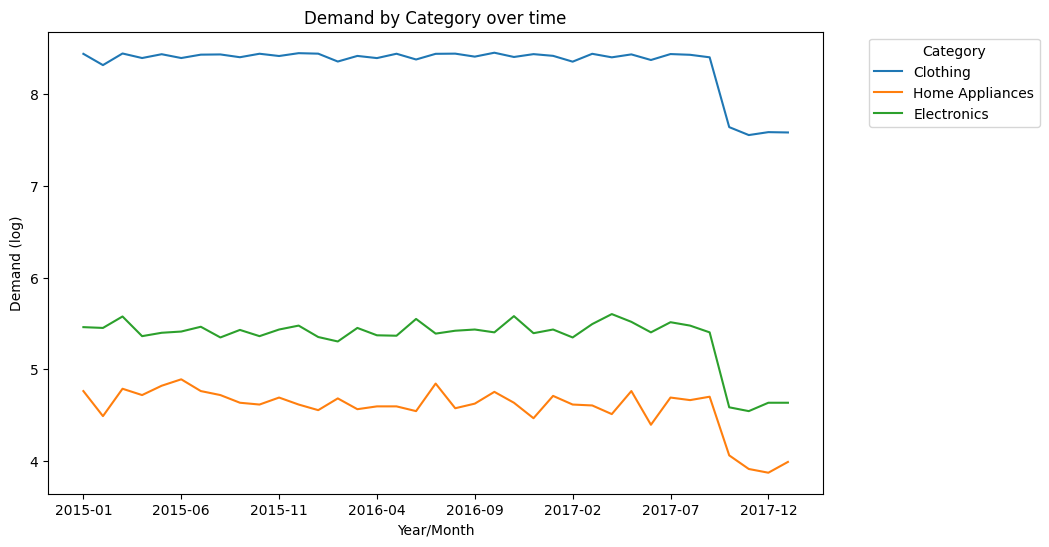

In [181]:
plt.figure(figsize=(10, 6))

for category in categories:
    # Filter the dataframe for each category
    product_data = df[df['Category'] == category]
    
    # Plot the sales over time for this product
    product_demand = np.log(product_data.groupby(['Year-Month']).size())
    product_demand.plot(kind = 'line', label=f'{category}')

plt.xlabel('Year/Month')
plt.ylabel('Demand (log)')
plt.title('Demand by Category over time')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [182]:
'''
There seems to be higher demand during odd months and drops in demand during even months.
'''

'\nThere seems to be higher demand during odd months and drops in demand during even months.\n'

In [183]:
### Demand Forecasting

Close, additive decomposition, month frequency


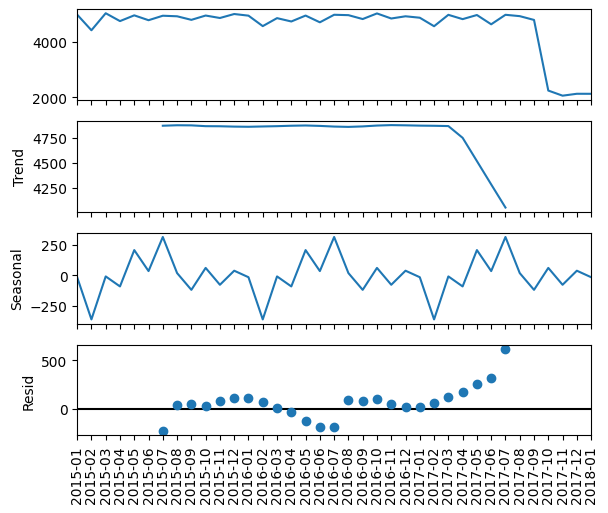

In [184]:
# ! pip install statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(date_sizes, model='additive', period = 12).plot()
plt.xticks(rotation=90)
print('Close, additive decomposition, month frequency')

C:\Users\kahsu\AppData\Local\Temp\ipykernel_34360\1256915365.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clothing_data.groupby('Month').size().plot(kind = 'line')


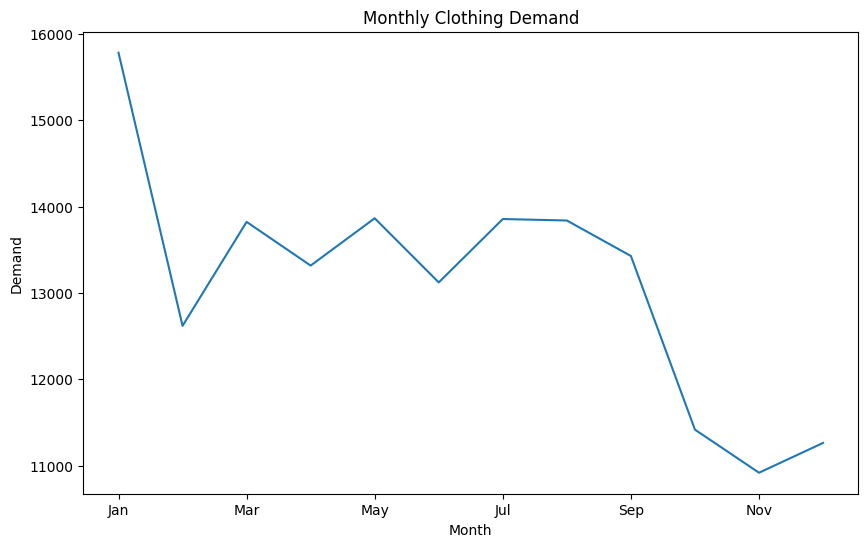

In [185]:
plt.figure(figsize=(10, 6))

clothing_data = df[df['Category'] == 'Clothing']
clothing_data.groupby('Month').size().plot(kind = 'line')

plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Monthly Clothing Demand')
plt.show()

C:\Users\kahsu\AppData\Local\Temp\ipykernel_34360\2150827907.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  electronic_data.groupby('Month').size().plot(kind = 'line')


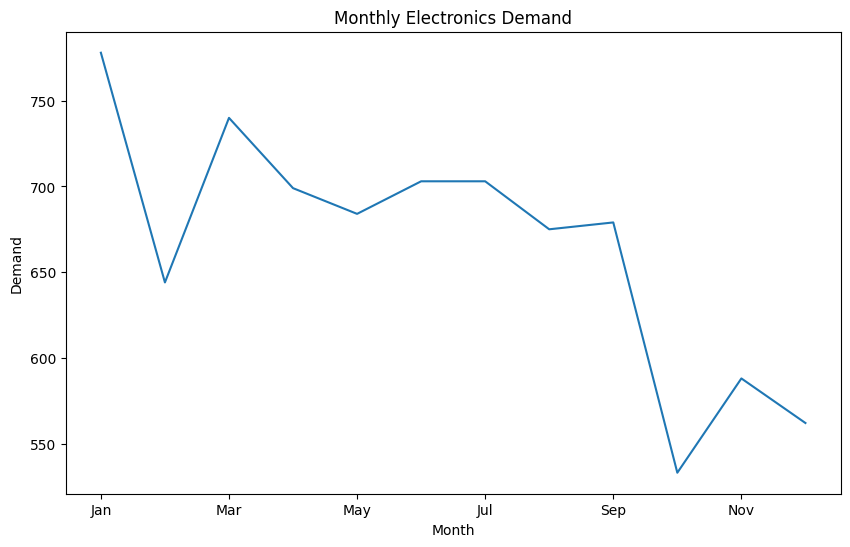

In [186]:
plt.figure(figsize=(10, 6))

electronic_data = df[df['Category'] == 'Electronics']
electronic_data.groupby('Month').size().plot(kind = 'line')

plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Monthly Electronics Demand')
plt.show()

C:\Users\kahsu\AppData\Local\Temp\ipykernel_34360\2229869112.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  home_data.groupby('Month').size().plot(kind = 'line')


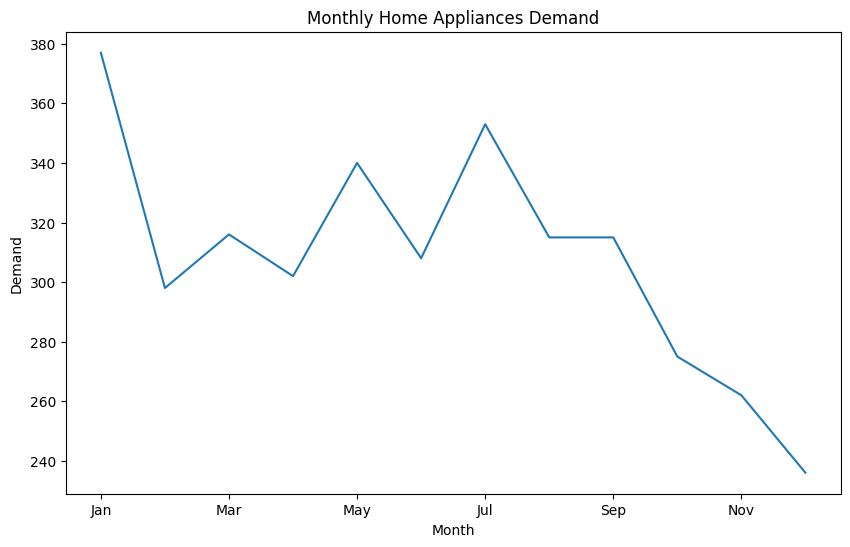

In [187]:
plt.figure(figsize=(10, 6))

home_data = df[df['Category'] == 'Home Appliances']
home_data.groupby('Month').size().plot(kind = 'line')

plt.xlabel('Month')
plt.ylabel('Demand')
plt.title('Monthly Home Appliances Demand')
plt.show()

In [188]:
###  Create an inventory optimization algorithm to balance stock levels and costs.

In [189]:
# feature engineering
# df[df['Category'] == 'Clothing'].groupby('Month').size().mean() # 13105.083
# df[df['Category'] == 'Electronics'].groupby('Month').size().mean() # 665.6
# df[df['Category'] == 'Home Appliances'].groupby('Month').size().mean() # 308.083
df.groupby('Category')['Price'].mean()

Category
Clothing           21.222797
Electronics        75.294940
Home Appliances    49.413121
Name: Price, dtype: float64

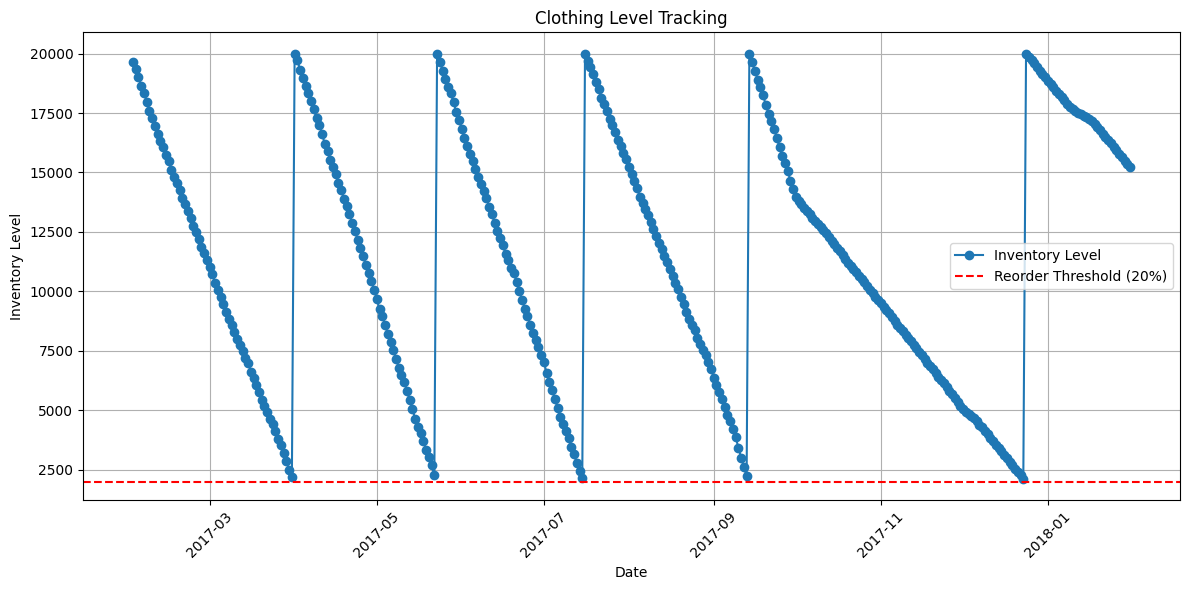

In [199]:
# Assuming a starting inventory level
starting_inventory = 20000
# Set reorder threshold at 10% of starting inventory
reorder_threshold = starting_inventory * 0.1
# Restock level when inventory goes below threshold
restock_amount = 20000  

clothing = df[df['Category'] == 'Clothing']
clothing = clothing.groupby('Order Date')['Order Item Quantity'].sum()
clothing = clothing[-365:]

# Initialize inventory level with starting inventory
inventory_levels = [starting_inventory]

# Calculate inventory levels with restocking logic
for order in clothing:
    # Calculate new inventory level
    new_inventory = inventory_levels[-1] - order

    # Check if inventory falls below threshold
    if new_inventory < reorder_threshold:
        new_inventory = restock_amount  # Restock to the specified level

    # Append the updated inventory level
    inventory_levels.append(new_inventory)

# Calculate inventory level by taking the cumulative sum of order quantities and adding starting inventory
clothing['Inventory Level'] = inventory_levels[1:]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(clothing.index[:-1], clothing['Inventory Level'], label='Inventory Level', marker='o')
plt.axhline(reorder_threshold, color='r', linestyle='--', label=f'Reorder Threshold (20%)')

# Highlight points below the reorder threshold
#below_threshold = clothing['Inventory Level'] < reorder_threshold
#plt.scatter(clothing[below_threshold]['Order Date'], clothing[below_threshold]['Inventory Level'], color='red', label='Below Threshold')

plt.xlabel('Date')
plt.ylabel('Inventory Level')
plt.title('Clothing Level Tracking')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

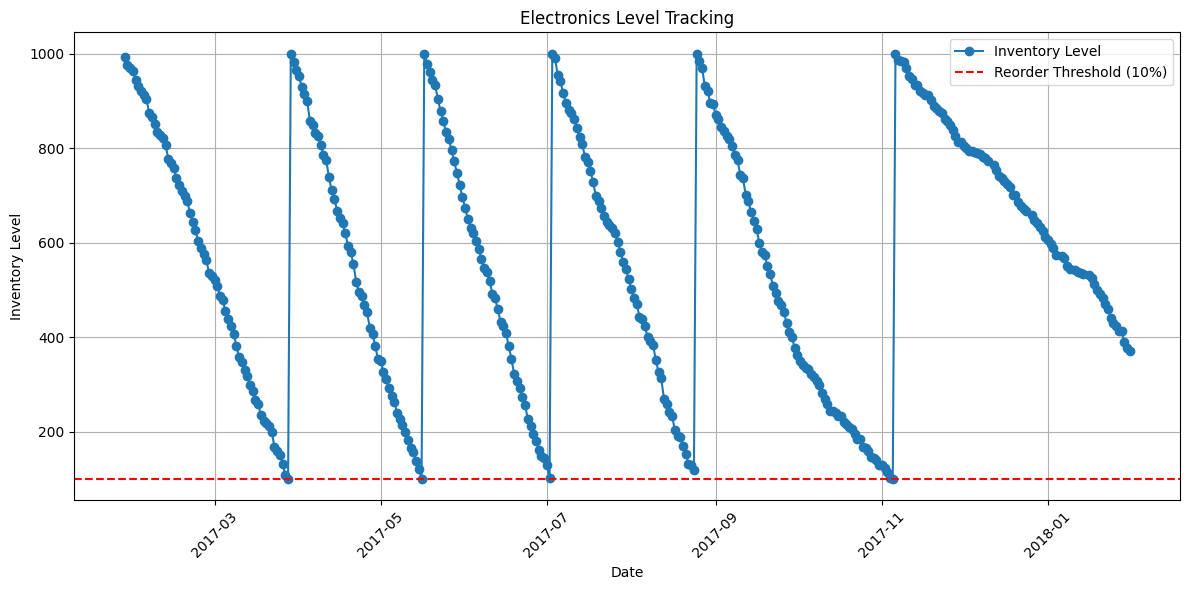

In [204]:
# Assuming a starting inventory level
starting_inventory = 1000
# Set reorder threshold at 20% of starting inventory
reorder_threshold = starting_inventory * 0.1
# Restock level when inventory goes below threshold
restock_amount = 1000  

electronics = df[df['Category'] == 'Electronics']
electronics = electronics.groupby('Order Date')['Order Item Quantity'].sum()
electronics = electronics[-365:]

# Initialize inventory level with starting inventory
inventory_levels = [starting_inventory]

# Calculate inventory levels with restocking logic
for order in electronics:
    # Calculate new inventory level
    new_inventory = inventory_levels[-1] - order

    # Check if inventory falls below threshold
    if new_inventory < reorder_threshold:
        new_inventory = restock_amount  # Restock to the specified level

    # Append the updated inventory level
    inventory_levels.append(new_inventory)

# Calculate inventory level by taking the cumulative sum of order quantities and adding starting inventory
electronics['Inventory Level'] = inventory_levels[1:]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(electronics.index[:-1], electronics['Inventory Level'], label='Inventory Level', marker='o')
plt.axhline(reorder_threshold, color='r', linestyle='--', label=f'Reorder Threshold (10%)')

plt.xlabel('Date')
plt.ylabel('Inventory Level')
plt.title('Electronics Level Tracking')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

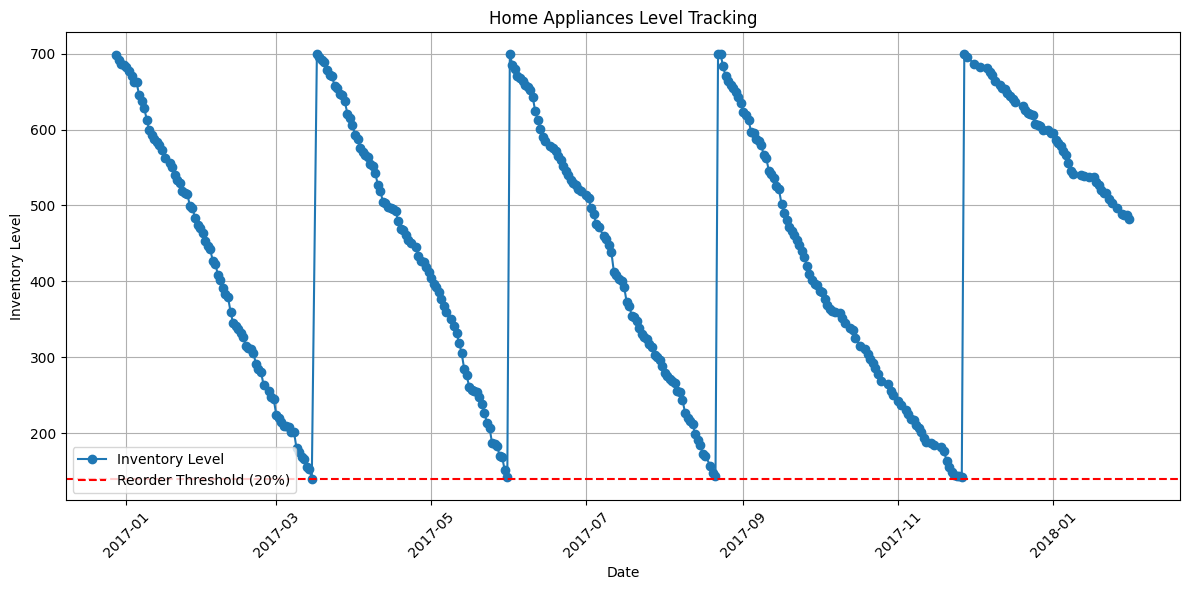

In [205]:
# Assuming a starting inventory level
starting_inventory = 700
# Set reorder threshold at 20% of starting inventory
reorder_threshold = starting_inventory * 0.2
# Restock level when inventory goes below threshold
restock_amount = 700  

home = df[df['Category'] == 'Home Appliances']
home = home.groupby('Order Date')['Order Item Quantity'].sum()
home = home[-365:]

# Initialize inventory level with starting inventory
inventory_levels = [starting_inventory]

# Calculate inventory levels with restocking logic
for order in home:
    # Calculate new inventory level
    new_inventory = inventory_levels[-1] - order

    # Check if inventory falls below threshold
    if new_inventory < reorder_threshold:
        new_inventory = restock_amount  # Restock to the specified level

    # Append the updated inventory level
    inventory_levels.append(new_inventory)

# Calculate inventory level by taking the cumulative sum of order quantities and adding starting inventory
home['Inventory Level'] = inventory_levels[1:]

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(home.index[:-1], home['Inventory Level'], label='Inventory Level', marker='o')
plt.axhline(reorder_threshold, color='r', linestyle='--', label=f'Reorder Threshold (20%)')

plt.xlabel('Date')
plt.ylabel('Inventory Level')
plt.title('Home Appliances Level Tracking')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [190]:
# !pip install gurobipy --quiet
# !pip install rsome --quiet

from rsome import ro
from rsome import grb_solver as grb

model = ro.Model('Inventory')
x = model.dvar(3)

storage = 20000
# min_capacity = 0.6 # must use at least 60% of capacity
s = np.array([21.222797, 75.294940, 49.413121])  # average selling price per unit
o = np.array([10, 30, 20])  # order cost per unit
# b = np.array([2.5, 3.0, 4.0])  # backorder cost
h = np.array([2.0, 4.0, 3.0])  # holding cost
d = np.array([13105.1, 665.7, 308.1])  # average monthly demand

# revenue = sum(s @ x - o @ x)
# lost_sales = sum(b * (d - x))
# # holding_cost = h * (x - d)
# profit = revenue - lost_sales

model.max(s @ d - o @ x - h @ (x - d))
model.st(sum(x) >= 0)
model.st(x[i] >= d[i] for i in range(3))
# model.st(sum(x) >= storage * min_capacity)
model.st(sum(x) <= storage)

model.solve(grb)

Being solved by Gurobi...
Solution status: 2
Running time: 0.0160s


In [191]:
model.get()

186290.90110280004

In [192]:
x.get()

array([13105.1,   665.7,   308.1])

In [194]:
# find top 10 products

product_data = df.groupby('Product Name').size()
product_data.sort_values().tail(10)

Product Name
vero moda womens regular fit tshirt                          93
aurelia womens cotton regular kurta                          94
yashika womens georgette printed saree with blouse piece     94
selvia women dress                                          101
anand sarees womens saree with blouse piece                 105
aurelia women kurta                                         111
levis womens 711 skinny fit jeans                           143
levis womens 710 super skinny fit jeans                     183
levis womens regular fit tshirt                             186
levis women tshirt                                          228
dtype: int64

In [195]:
# bottom 10 products

product_data.sort_values().head(10)

Product Name
rangita women floral printed georgette saree with blouse piece  wine                                                     1
db desh bidesh womens traditional bengali bengamuri pure handloom cotton saree with blouse piece                         1
miss chase womens teal round neck 34 sleeves floral lace overlaid kneelong bodycon dress with zip closure                1
ishin womens art silk navy blue  grey printed saree with blouse piece                                                    1
plumbury womens high waist cotton lycra safety shortsunder skirt shortsboyshort panty with lacefree size blackbeige      1
corefab flared solid rayon palazzo in 10 attractive colours for womens and girls in sizes  2830323436 and 38 in          1
ishin womens cream lurex waisted dress                                                                                   1
van heusen women lounge tshirt  100 supima cotton  round neck short sleeve superior drape ultra soft                     1
sal

C:\Users\kahsu\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


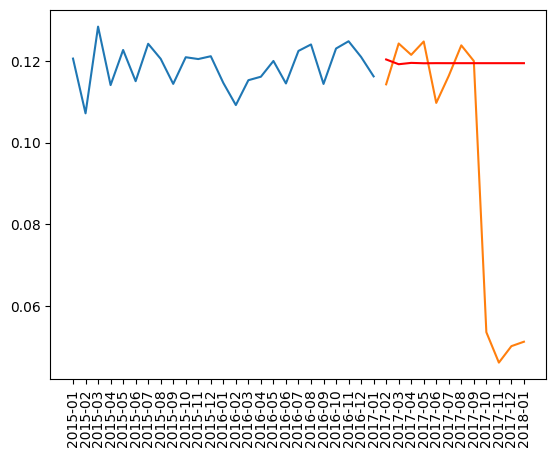

In [196]:
from statsmodels.tsa.arima.model import ARIMA

date_sales = np.array(df.groupby('Year-Month')['Price'].sum() / 1e6)

train_size = int(len(date_sales) * 0.7)
train, test = date_sales[:train_size], date_sales[train_size:]

dates = df['Year-Month'].unique()
train_dates = dates[:train_size]
test_dates = dates[train_size:]

model = ARIMA(train, order=(1, 1, 1))  # can use (p, d, q) grid search to find the best parameters
arima_model = model.fit()

forecast = arima_model.forecast(steps=len(test))
plt.plot(train_dates, train, label='Train')
plt.plot(test_dates, test, label='Test')
plt.plot(test_dates, forecast, label='Forecast', color='red')
plt.xticks(rotation=90)
plt.show()

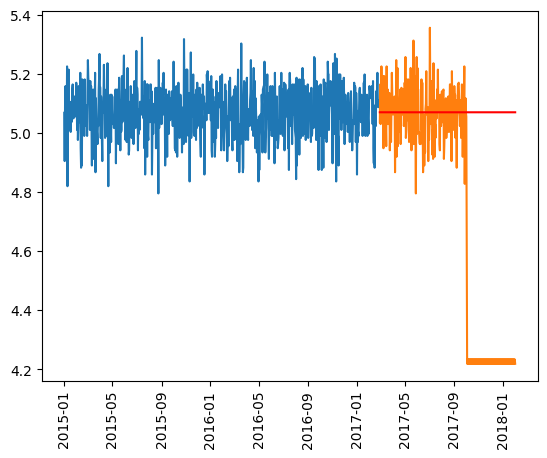

In [197]:
date_sales = np.array(np.log(df.groupby('Order Date').size()))

train_size = int(len(date_sales) * 0.7)
train, test = date_sales[:train_size], date_sales[train_size:]

dates = df['Order Date'].unique()
train_dates = dates[:train_size]
test_dates = dates[train_size:]

model = ARIMA(train, order=(1, 1, 1))  # can use (p, d, q) grid search to find the best parameters
arima_model = model.fit()

forecast = arima_model.forecast(steps=len(test))
plt.plot(train_dates, train, label='Train')
plt.plot(test_dates, test, label='Test')
plt.plot(test_dates, forecast, label='Forecast', color='red')
plt.xticks(rotation=90)
plt.show()                 

In [218]:
retail = pd.read_csv("Orders Table.csv")

In [219]:
retail.shape

(168946, 20)

In [214]:
data = pd.read_csv("DataCoSupplyChainDataset.csv", encoding_errors = 'ignore')